In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Polygon

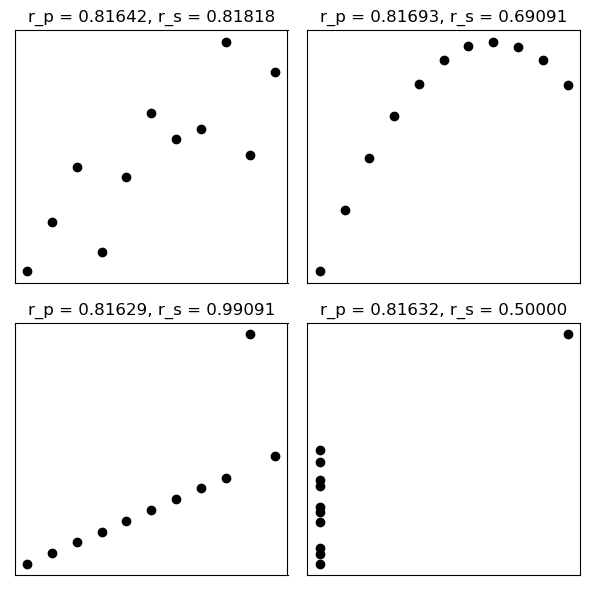

In [2]:
anscombe = np.array([
    [10, 8.04,  10, 9.14, 10, 7.46,  8, 6.58],
    [8,  6.95,  8,  8.14, 8,  6.77,  8, 5.75],
    [13, 7.58,  13, 8.76, 13, 12.74, 8, 7.71],
    [9,  8.81,  9,  8.77, 9,  7.11,  8, 8.84],
    [11, 8.33,  11, 9.26, 11, 7.81,  8, 8.47],
    [14, 9.96,  14, 8.10, 14, 8.84,  8, 7.04],
    [6,  7.24,  6,  6.13, 6,  6.08,  8, 5.25],
    [4,  4.26,  4,  3.10, 4,  5.39,  8, 5.56],
    [12, 10.84, 12, 9.13, 12, 8.15,  8, 7.91],
    [7,  4.82,  7,  7.26, 7,  6.42,  8, 6.89],
    [5,  5.68,  5,  4.74, 5,  5.73,  19, 12.50]
])

fig, ax = plt.subplots(2, 2, figsize=(6, 6))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i].plot(anscombe[:, i * 2], anscombe[:, i * 2 + 1], 'ko')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:, i * 2], anscombe[:, i * 2 + 1])[0]
    corr_s = stats.spearmanr(anscombe[:, i * 2], anscombe[:, i * 2 + 1])[0]
    ax[i].set_title(f'r_p = {corr_p:.5f}, r_s = {corr_s:.5f}')

plt.tight_layout()
plt.show()

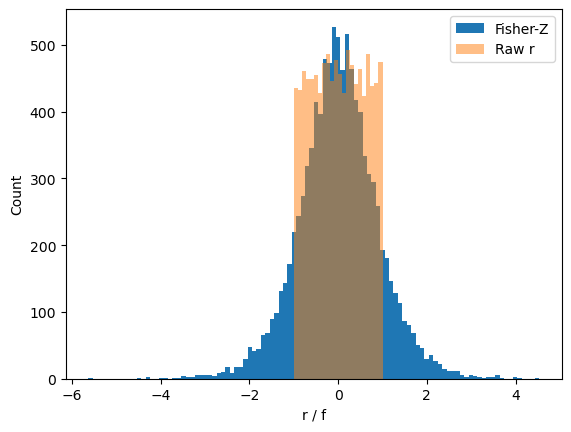

In [3]:
N = 10000
#r = 2 * np.random.rand(N) - 1
r = stats.uniform.rvs(scale=2, loc=-1, size=N)

fz = np.arctanh(r)

#y, x = np.histogram(fz, 30)
#x = (x[:-1] + x[1:]) / 2
#plt.bar(x, y)
plt.hist(fz, bins='fd')

#y, x = np.histogram(r, 30)
#x = (x[1:] + x[:-1]) / 2
#plt.bar(x, y)
plt.hist(r, bins='fd', alpha=0.5)

plt.xlabel('r / f')
plt.ylabel('Count')
plt.legend(['Fisher-Z', 'Raw r'])

plt.show()

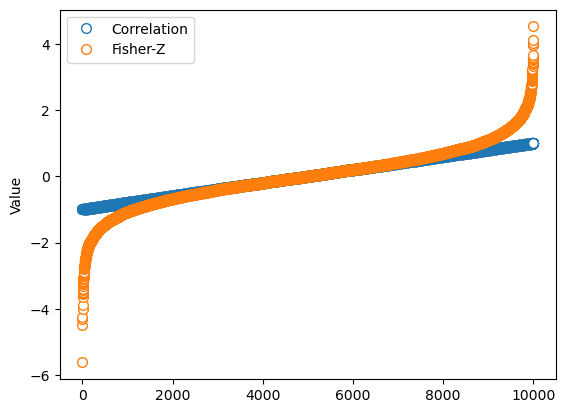

In [4]:
plt.plot(range(N), np.sort(r), 'o', markerfacecolor='w', markersize=7)
plt.plot(range(N), np.sort(fz), 'o', markerfacecolor='w', markersize=7)

plt.ylabel('Value')
plt.legend(['Correlation', 'Fisher-Z'])
#plt.ylim([-0.8, 0.8])

plt.show()

In [5]:
N = 1000
data1 = np.random.randn(N)
data2 = data1 + np.random.randn(N)

corr_s = stats.spearmanr(data1, data2)[0]

data1_rank = stats.rankdata(data1)
data2_rank = stats.rankdata(data2)

corr_rank_s = stats.pearsonr(data1_rank, data2_rank)[0]

print(corr_s)
print(corr_rank_s)

0.6813164973164973
0.6813164973164973


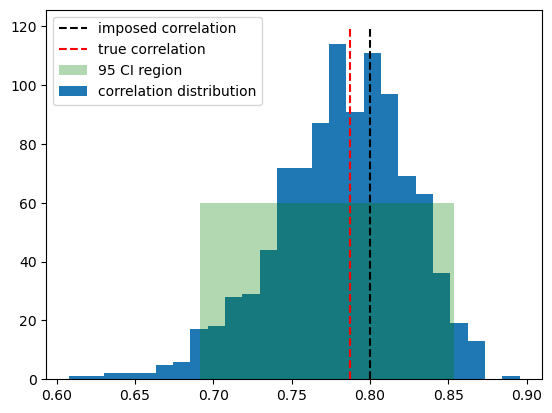

In [11]:
sample_size = 100
boots_n = 1000
s = 0.8
confidence = 95
boots_s = np.ones(boots_n)

x = np.random.randn(sample_size)
y = np.random.randn(sample_size)
y = x * s + y * np.sqrt(1 - s ** 2)

for i in range(boots_n):
    idx = np.random.choice(sample_size, sample_size)
    boots_s[i] = stats.spearmanr(x[idx], y[idx])[0]

corr = stats.spearmanr(x, y)[0]

conf_int = np.percentile(boots_s, [(100 - confidence) / 2, 100 - (100 - confidence) / 2])

y = np.array([[conf_int[0], 0], [conf_int[1], 0], [conf_int[1], 60], [conf_int[0], 60]])
p = Polygon(y, facecolor='g', alpha=0.3)

fig, ax = plt.subplots(1, 1)

ax.hist(boots_s, bins='fd')
y_lim = plt.ylim()
ax.plot([s, s], y_lim, 'k--')
ax.plot([corr, corr], y_lim, 'r--')
ax.add_patch(p)

plt.legend(['imposed correlation', 'true correlation', f'{confidence} CI region', 'correlation distribution'])

plt.show()

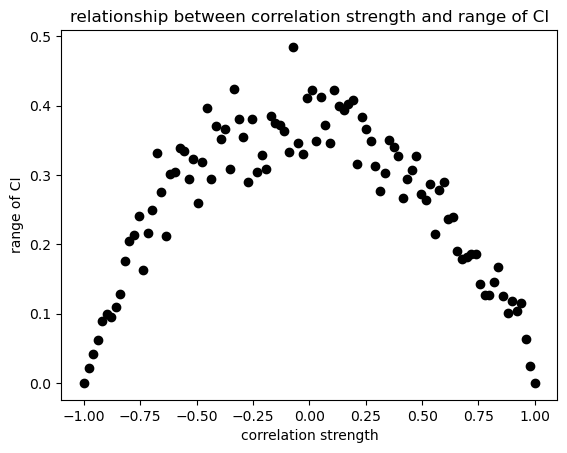

In [25]:
s_size = 100
sample_size = 100
boots_n = 100
confidence = 95
s_correlations = np.linspace(-1, 1, s_size)
s_conf_int = np.ones(s_size)

for i, s in enumerate(s_correlations):
    
    boots_s = np.ones(boots_n)
    x = np.random.randn(sample_size)
    y = np.random.randn(sample_size)
    y = x * s + y * np.sqrt(1 - s ** 2)
    
    for j in range(boots_n):
        idx = np.random.choice(sample_size, sample_size)
        boots_s[j] = stats.spearmanr(x[idx], y[idx])[0]
    
    s_conf_int[i] = np.percentile(boots_s, 100 - (100 - confidence) / 2) - np.percentile(boots_s, (100 - confidence) / 2)

plt.plot(s_correlations, s_conf_int, 'ko')
plt.title('relationship between correlation strength and range of CI')
plt.xlabel('correlation strength')
plt.ylabel('range of CI')

plt.show()